In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa as tsm
import matplotlib.pyplot as plt
from astsadata import *

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


# Section 3.1 Autoregressive Moving Average Models

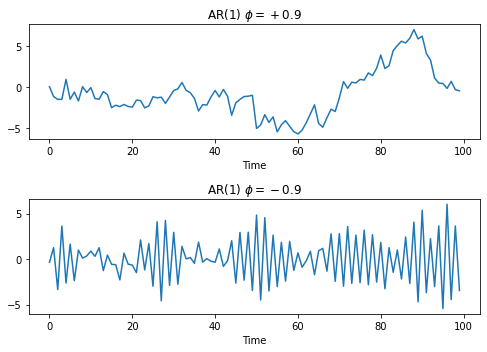

In [2]:
# Example 3.2
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
axes[0].plot(sm.tsa.arma_generate_sample(ar=[1, -.9], ma=[1, 0], nsample=100))
axes[0].set_xlabel("Time")
axes[0].set_title(r"AR(1) $\phi = +0.9$")
axes[1].plot(sm.tsa.arma_generate_sample(ar=[1, .9], ma=[1, 0], nsample=100))
axes[1].set_xlabel("Time")
axes[1].set_title(r"AR(1) $\phi = -0.9$")
fig.tight_layout()
plt.show()

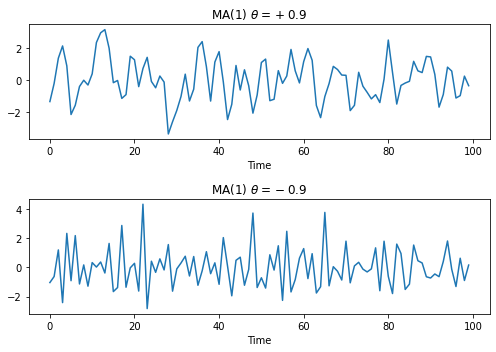

In [3]:
# Example 3.5
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
axes[0].plot(sm.tsa.arma_generate_sample(ar=[1, 0], ma=[1, .9], nsample=100))
axes[0].set_xlabel("Time")
axes[0].set_title(r"MA(1) $\theta = +0.9$")
axes[1].plot(sm.tsa.arma_generate_sample(ar=[1, 0], ma=[1, -.9], nsample=100))
axes[1].set_xlabel("Time")
axes[1].set_title(r"MA(1) $\theta = -0.9$")
fig.tight_layout()
plt.show()

In [4]:
# Example 3.7
np.random.seed(8675309) # Jenny, I got your number
x = np.random.normal(loc=5, size=15000) # Jenerate iid N(5, 1)s

mod = sm.tsa.arima.ARIMA(x, order=(1, 0, 1), enforce_invertibility=False, enforce_stationarity=False)
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                15000
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -21281.889
Date:                Tue, 18 May 2021   AIC                          42571.778
Time:                        12:23:19   BIC                          42602.241
Sample:                             0   HQIC                         42581.885
                              - 15000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9981      0.008    622.139      0.000       4.982       5.014
ar.L1          0.4020      0.585      0.687      0.492      -0.745       1.549
ma.L1         -0.4118      0.583     -0.707      0.4

In [5]:
# Example 3.8
# leads=11 instead of 10, because Python, unlike R, prints zero-indexed coefficient too
print(tsm.arima_process.arma2ma(ar=[1, -.9], ma=[1, .5], lags=11))
print(tsm.arima_process.arma2ma(ar=[1, .5], ma=[1, -.9], lags=11))

[1.         1.4        1.26       1.134      1.0206     0.91854
 0.826686   0.7440174  0.66961566 0.60265409 0.54238868]
[ 1.         -1.4         0.7        -0.35        0.175      -0.0875
  0.04375    -0.021875    0.0109375  -0.00546875  0.00273437]
